In [1]:
from fastai.vision.all import  *


In [2]:
torch.cuda.is_available()

True

In [12]:
torch.device('cuda')

device(type='cuda')

In [3]:
path=untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH=path

In [5]:
mnist=DataBlock(blocks=(ImageBlock,CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(),
                get_y=using_attr(RegexLabeller(r'training.(.)'),'ls'))

In [6]:
dls=mnist.dataloaders(path/'training')

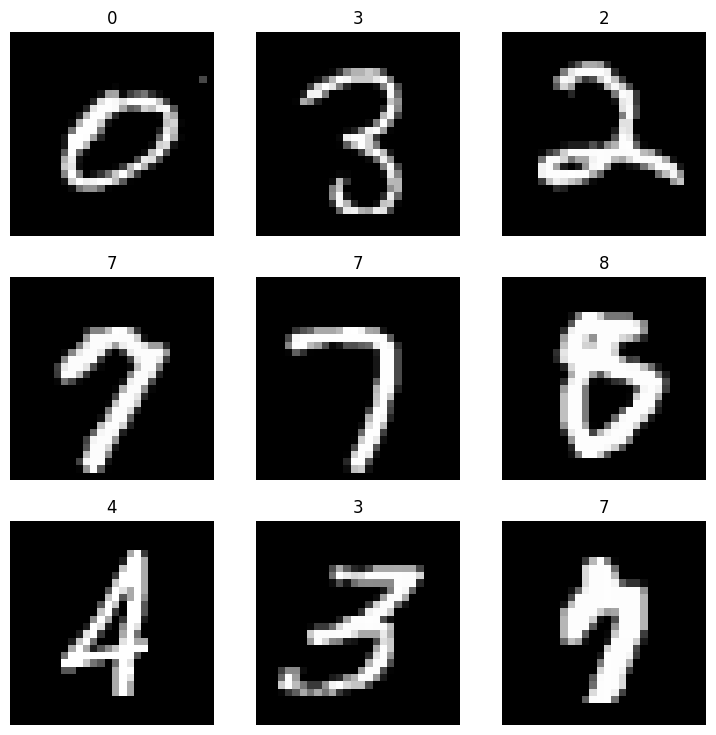

In [7]:
dls.show_batch(max_n=9)

In [13]:
learner=vision_learner(dls,resnet18,metrics=accuracy)

/home/ozkanib20/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ozkanib20/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.001737800776027143)

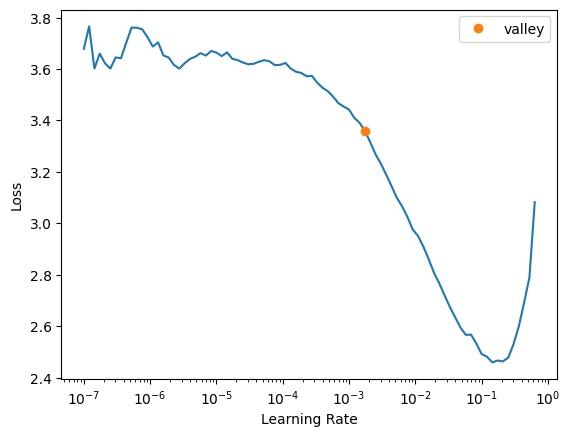

In [9]:
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.226219,0.138167,0.957750,00:42
1,0.116213,0.072465,0.977417,00:40


In [12]:
learner.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

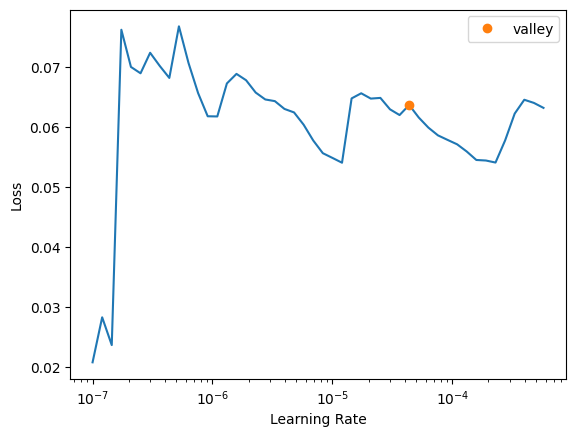

In [14]:
learner.lr_find()

In [17]:
learner.fit_one_cycle(5,lr_max=slice(2e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.065637,0.054741,0.982500,00:52
1,0.050410,0.046951,0.984500,00:52
2,0.043352,0.045409,0.985917,00:52
3,0.036980,0.043013,0.986417,00:53
4,0.025923,0.042378,0.986500,00:54


In [19]:
interp=ClassificationInterpretation.from_learner(learner)

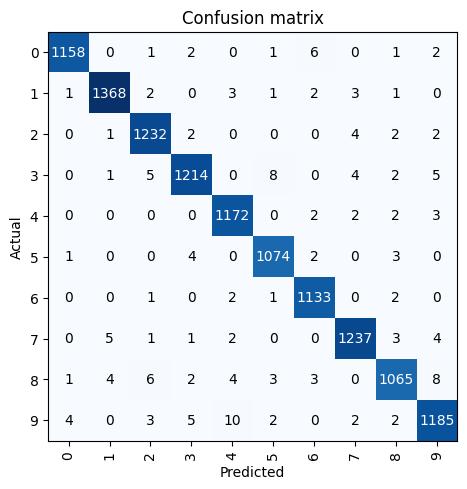

In [20]:
interp.plot_confusion_matrix()